the images for this are available at 
https://drive.google.com/open?id=1_gxVdFLl5jPFb4uba2Tccj4Tdq6qvkR7
The additional 60,000 images from wiki are here:
https://drive.google.com/open?id=1iaR9oGS-rPbake-lCkD43OkM8YmlWCCx

Sample code for this CNN was taken from 
https://github.com/nikhitmago/deep-cnn-for-image-colorization/blob/master/(Deep)%20CNNs%20for%20Image%20Colorization.ipynb

In [0]:
#loading images as a list 
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import image
import os
from PIL import Image
import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense, Flatten,BatchNormalization, UpSampling2D
from keras import optimizers
from skimage.color import rgb2grey
%matplotlib inline
from io import BytesIO

### Uploading Images as a list

In [0]:
from google.colab import files

In [0]:
color = files.upload()

In [0]:
color_images = color
file_name = [f for f in color_images.keys()]

In [0]:
color = list()
for name in file_name:
# load image
    color_data = np.array(Image.open(BytesIO(color_images[name])))
# store loaded image
    color.append(color_data)

In [0]:
len(color_images)

In [0]:
bw = list()

for item in color:
  pic = item
  pic = Image.fromarray(pic)
  pic = pic.convert('L')
  pic = np.array(pic)
  bw.append(pic)


In [0]:

#bw = list()
#for name in file_name2:
# load image
#    bw_data = np.array(Image.open(BytesIO(bw_images[name])))
# store loaded image
#    bw.append(bw_data)

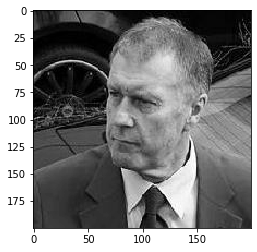

In [0]:
plt.imshow(bw[1], cmap='gray')

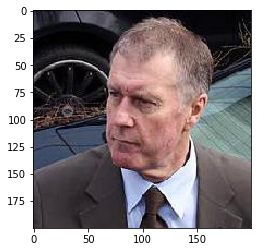

In [0]:
plt.imshow(color[1])

### Converting Image Lists to Arrays

In [0]:
bw = np.array(bw)/255
color = np.array(color)/255

In [0]:
bw.shape

In [0]:
color.shape

In [0]:
bw = bw.reshape(2786, 200, 200,1)
color = color.reshape(2786, 200, 200,3)

In [0]:
print('Black and White Shape',bw.shape)
print('Color Shape',color.shape)

In [0]:
(200/2786)*100

In [0]:
X_train = bw[:-200]
X_test = bw[-200:]

y_train = color[0:-200]
y_test = color[-200:]

In [8]:
#model Initial
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (3,3),activation='relu', padding='same', input_shape = (200,200,1)))
#cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(16, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
cnn.add(Conv2D(34, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
cnn.add(Conv2D(34, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
cnn.add(Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(64, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
cnn.add(Conv2D(34, kernel_size = (5,5), strides=(1, 1),activation='relu', padding='same'))
#cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(16, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
#cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(3, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
#cnn.add(Dense(64,input_shape=(3,), activation='relu'))
#cnn.add(Dense(3,input_shape=(3,), activation='relu'))
cnn.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 8)       80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 34)      4930      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 200, 200, 34)      10438     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 200, 200, 64)      54464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 128)

In [0]:
from keras.utils.vis_utils import plot_model

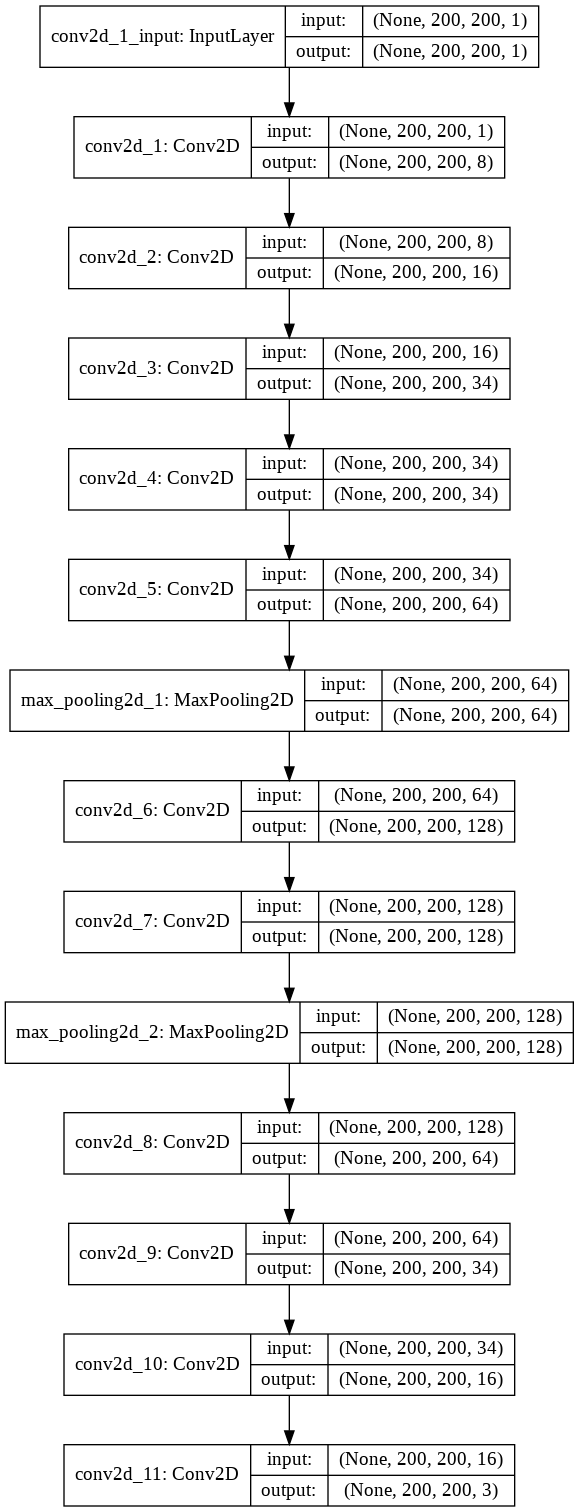

In [12]:
plot_model(cnn, to_file = 'model_diagram.png',show_shapes = True, show_layer_names = True)

In [0]:
#sgd = optimizers.SGD(lr=0.001, momentum=0.005)
#'Adam' as best optimizer so far
#best at 20 epochs
#try adding dense layer at the end
#try moving max pooling layer

In [0]:
#model test
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (3,3),activation='relu', padding='same', input_shape = (200,200,1)))
cnn.add(Conv2D(16, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
cnn.add(Conv2D(34, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1),activation='relu', padding='same'))
cnn.add(Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
cnn.add(Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dense(64,input_shape=(3,), activation='relu'))
cnn.add(Dense(3,input_shape=(3,), activation='relu'))
cnn.summary()

Train on 2198 samples, validate on 388 samples
Epoch 1/100
2198/2198 [==============================] - 31s 14ms/step - loss: 903.7853 - acc: 0.6899 - mean_squared_error: 18040.9647 - val_loss: 481.3531 - val_acc: 0.7098 - val_mean_squared_error: 21991.4144
Epoch 2/100
2198/2198 [==============================] - 29s 13ms/step - loss: 396.1837 - acc: 0.7143 - mean_squared_error: 15217.4047 - val_loss: 481.1872 - val_acc: 0.7169 - val_mean_squared_error: 20794.8833
Epoch 3/100
2198/2198 [==============================] - 29s 13ms/step - loss: 396.0802 - acc: 0.7150 - mean_squared_error: 15108.4516 - val_loss: 481.2407 - val_acc: 0.7167 - val_mean_squared_error: 21049.5833
Epoch 4/100
2198/2198 [==============================] - 29s 13ms/step - loss: 396.0470 - acc: 0.7123 - mean_squared_error: 15231.6272 - val_loss: 481.0854 - val_acc: 0.7167 - val_mean_squared_error: 20707.8248
Epoch 5/100
2198/2198 [==============================] - 29s 13ms/step - loss: 395.9005 - acc: 0.7051 - mean_

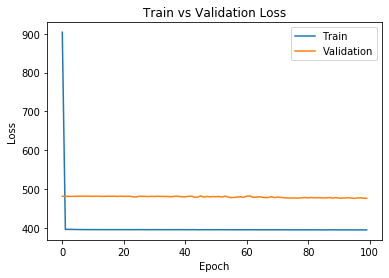

In [0]:
cnn.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy', 'mse'])
history = cnn.fit(X_train, y_train, epochs=100, validation_split=0.15)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
predictions = cnn.predict(X_test)

In [0]:
predictions.shape

(200, 200, 200, 3)

In [0]:
predictions[0]

array([[[ 40.207928,  38.804157,  37.98842 ],
        [ 66.478226,  68.00883 ,  65.663895],
        [ 85.58745 ,  86.891   ,  84.82994 ],
        ...,
        [112.147606, 111.39233 , 111.79709 ],
        [ 82.648056,  84.0489  ,  84.64084 ],
        [ 45.90724 ,  44.999577,  46.019653]],

       [[ 69.66168 ,  68.17274 ,  67.87717 ],
        [114.92595 , 115.07603 , 115.18656 ],
        [147.40117 , 148.1421  , 147.93872 ],
        ...,
        [191.61089 , 189.52757 , 189.38672 ],
        [143.22887 , 141.9755  , 141.72389 ],
        [ 76.16109 ,  74.71297 ,  78.74605 ]],

       [[ 89.38248 ,  88.411736,  89.78693 ],
        [149.94975 , 148.95474 , 151.8176  ],
        [192.93535 , 195.18211 , 196.61526 ],
        ...,
        [254.27986 , 255.79137 , 252.98383 ],
        [190.88297 , 191.08133 , 190.33922 ],
        [100.42299 ,  99.87868 , 100.83737 ]],

       ...,

       [[122.83299 , 122.54264 , 119.04877 ],
        [206.92798 , 204.51553 , 201.61295 ],
        [259.93457 , 2

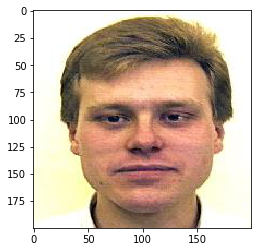

In [0]:
plt.imshow(y_test[0]/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


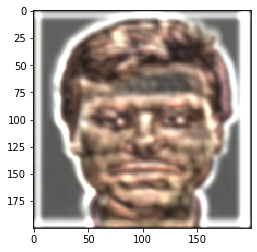

In [0]:
plt.imshow(predictions[0]/255)

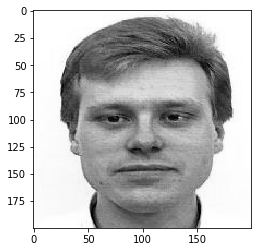

In [0]:
plt.imshow(X_test[0].reshape(200,200), cmap='gray')

In [0]:
ashish = files.upload()


Saving ashish2.jpg to ashish2.jpg


In [0]:
file_name3 = [f for f in ashish.keys()]
for name in file_name3:
# load image
    ashish_bw = np.array(Image.open(BytesIO(ashish[name])))


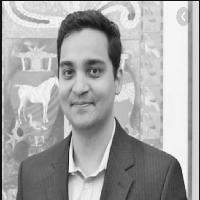

In [0]:
Image.open('/content/ashish2.jpg')

In [0]:
ashish_bw

array([[ 26,   0,  38, ...,  12,  34,  14],
       [ 17,  43, 187, ..., 239, 195,  28],
       [ 10,  29, 209, ..., 237, 219,  22],
       ...,
       [ 18,  27, 188, ..., 215, 214,  21],
       [ 15,  23, 184, ..., 215, 214,  21],
       [ 22,  24, 184, ..., 215, 214,  21]], dtype=uint8)

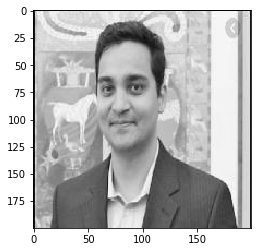

In [0]:
plt.imshow(ashish_bw,cmap='gray')

In [0]:
ashish_bw.shape

(200, 200)

In [0]:
ashish_bw = ashish_bw.reshape(1,200, 200,1)

In [0]:
ashish_bw = ashish_bw/255
ashish_bw.shape

(1, 200, 200, 1)

In [0]:
ashish_predict = cnn.predict(ashish_bw)

In [0]:
ashish_predict.shape

(1, 200, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


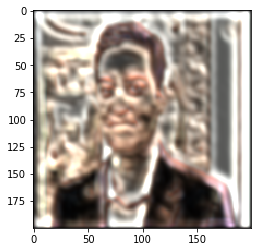

In [0]:
plt.imshow(ashish_predict[0]/255)

In [0]:
pred = ashish_predict[0]/255

In [0]:
pred*255*255

array([[[ 4395.3086 ,  3705.7766 ,  3288.1562 ],
        [ 8444.296  ,  8068.91   ,  7671.7593 ],
        [ 9303.826  ,  8878.254  ,  8511.389  ],
        ...,
        [ 4227.6157 ,  4186.1504 ,  4066.648  ],
        [ 3469.409  ,  3558.2097 ,  3351.2122 ],
        [ 2493.621  ,  2729.4697 ,  2655.9019 ]],

       [[ 7040.8447 ,  5484.0537 ,  6663.759  ],
        [13405.365  , 11805.291  , 12133.004  ],
        [14256.677  , 13318.121  , 13296.834  ],
        ...,
        [ 5827.4985 ,  6030.4023 ,  6056.773  ],
        [ 4511.767  ,  5068.671  ,  4947.5137 ],
        [ 2777.3147 ,  3348.9924 ,  3321.5422 ]],

       [[ 7152.199  ,  6602.1455 ,  6831.9116 ],
        [13461.618  , 12648.249  , 12207.136  ],
        [14411.402  , 13903.944  , 13326.435  ],
        ...,
        [ 5952.449  ,  5735.2827 ,  5790.7886 ],
        [ 4657.0864 ,  4618.0015 ,  4635.138  ],
        [ 2916.2964 ,  2925.8752 ,  3142.7925 ]],

       ...,

       [[ 5181.7754 ,  4725.6836 ,  5621.112  ],
        [ 9

In [0]:
ashish_save = Image.fromarray(ashish_predict[0])
ashish_save.save('ashish_save.jpg')

In [0]:
files.download('ashish_save.jpg')